## Linear Regression and RANSAC

In [1]:
# Load the modules we need
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

In [2]:
#  Create some intial data
n_samples = 1000

X, y = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      random_state=0)

In [3]:
# Add some outlier data
np.random.seed(0)
n_outliers = 50
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [4]:
# Create some test positions for for the lines we will draw
line_X = np.arange(X.min(), X.max())[:, np.newaxis]

In [5]:
def doProcessing(arrX, arry):
    # [sumX, sumX2, sumy, sumXy, n] 
    info = [0, 0, 0, 0, 0]
    for counter in range(len(arry)):
        info[0] = info[0] + arrX[counter]
        info[1] = info[1] + (arrX[counter] * arrX[counter])
        info[2] = info[2] + arry[counter]
        info[3] = info[3] + (arrX[counter] * arry[counter])
    info[4] = len(arry)
    return info

def findYValue(X, m, c):
    return (m * X) + c

def manuallr(arrX, arry, predictionvalues):
    info = doProcessing(arrX, arry)
    # y = mx + c
    m = (info[4] * info[3] - info[0] * info[2])/(info[4] * info[1] - info[0] * info[0])
    c = (info[2] - m * info[0]) / info[4]
    
    points = []
    
    for element in predictionvalues:
        points.append(findYValue(element, m, c))
    return points
    

In [6]:
# This is the cell you need to replace to complete Task 2.
# Fit line using all data.
# lr = linear_model.LinearRegression()
# lr.fit(X, y)
# line_y = lr.predict(line_X)
# print(line_y)

# Hand coded linear regression
line_y = np.array(manuallr(X, y, line_X))
print(line_y)

[[-174.38323639]
 [-120.21087252]
 [ -66.03850865]
 [ -11.86614478]
 [  42.30621909]
 [  96.47858295]
 [ 150.65094682]
 [ 204.82331069]]


In [7]:
import math
import random

def calcmc(xpoint1, ypoint1, xpoint2, ypoint2):
    horizontalgrad = xpoint2 - xpoint1
    verticalgrad = ypoint2 - ypoint1
    m = verticalgrad/horizontalgrad
    c = ypoint1 - (m * xpoint1)
    return [m, c]

def classifyinlier(X, y, m, c, threshold):
    inlier = []
    for i in range(len(y)):
        if distPointLine([y[i], X[i]], m, c) < threshold:
            inlier.append(True)
        else:
            inlier.append(False)
    return inlier

# point = [y, x]
def distPointLine(point, m, c):
    # liney = m * point[1] + c
    # linex = (point[0] - c) / m
    
    return abs((m * point[1] - point[0] + c)) / (math.sqrt(m * m + 1))

def countOutliers(array):
    counter = 0
    for element in array:
        if element == False:
            counter = counter + 1   
    return counter

def manualRANSAC(X, y, predictionvalues, iterations, threshold):
    oldmc = []
    oldcount = 999999999
    array = []
    for i in range(iterations):
        position1 = random.randrange(0, len(y))
        position2 = random.randrange(0, len(y))
        while (position1 == position2):
            position2 = random.randrange(0, len(y))
        point1 = [y[position1], X[position1]]
        point2 = [y[position2], X[position2]]
        
        mc = calcmc(point1[1], point1[0], point2[1], point2[0])
        array = classifyinlier(X, y, mc[0], mc[1], threshold)
        outliercount = countOutliers(array)
        if outliercount < oldcount:
            oldmc = mc
            oldcount = outliercount
    return (predictionvalues * oldmc[0]) + oldmc[1], array
            
        

In [8]:
# This is the cell you need to replace to complete Task 3.
# Robustly fit linear model with RANSAC algorithm
# ransac = linear_model.RANSACRegressor()
# ransac.fit(X, y)

# Predict data of estimated models
# line_y_ransac = ransac.predict(line_X)
# print(line_y_ransac)

result = manualRANSAC(X, y, line_X, 1500, 1)
line_y_ransac = result[0]
print(line_y_ransac)
inlier_mask = result[1]
outlier_mask = np.logical_not(inlier_mask)

# Label the if source data is inlier or outlier
# inlier_mask = ransac.inlier_mask_
# outlier_mask = np.logical_not(inlier_mask)

[[-269.92792838]
 [-184.35063649]
 [ -98.7733446 ]
 [ -13.19605271]
 [  72.38123918]
 [ 157.95853107]
 [ 243.53582296]
 [ 329.11311485]]


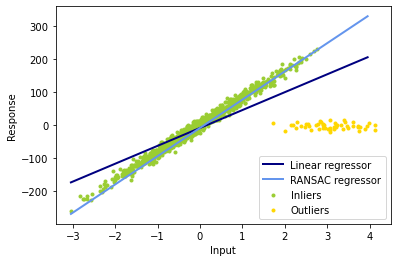

In [9]:
lw = 2

doing_linear = True
doing_ransac = True

if (doing_linear):
    plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')

if (doing_ransac):
    plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
    plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
    plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')
else:
    plt.scatter(X, y, color='yellowgreen', marker='.', label='Data')
    
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()